# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Quiamjot, Allyn Christian\
_Student No._: 2021-07198\
_Section_: HX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov 9, 2023 1:52 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: ALLYN CHRISTIAN I. QUIAMJOT**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [1]:
import numpy as np
N = 3               #   NxN matrix is 3x3 matrix                 
A = np.array([[8,-2,-20],[-2,-3,-9],[-20,-9,-3]],int)       #   defining matrix A using numpy.array with int values, manual input

#   linalg.eigh computes for eigenvalues and eigenvectors of a symmetric Hermitian matrix.
#   It returns the eigenvalues and eigenvectors, respectively.
eValues, eVectors = np.linalg.eigh(A)                       #   store eigenvalues and eigenvectors as 2 different matrices

D = np.zeros((N,N))                 #   creating an NxN zero matrix
for k in range(N):                  #   create a diagonal matrix with eigenvalues at the diagonal
    D[k][k] = eValues[k]            #   assigning eigenvalues to diagonals

AV = np.matmul(A,eVectors)          #   matrix multiplication of A and eigenvectors
VD = np.matmul(eVectors,D)          #   matrix multiplication of eigenvectors and diagonal matrix

print(AV==VD)                       #   compares whether individual elements in matrices are equal
print('\n')
print(AV - VD)

[[False False  True]
 [False False False]
 [ True False False]]


[[-3.55271368e-15  1.94982919e-15  0.00000000e+00]
 [-1.77635684e-15  3.88578059e-16  1.33226763e-15]
 [ 0.00000000e+00 -2.24126273e-15  8.88178420e-15]]


Comparing AV and VD using the comparison operator ==, it showed that the two matrices are not entirely equal. 

Further investigation is conducted by subtracting AV and VD. The result is a 3x3 matrix with values near zero. Only two values inside the matrix is exactly zero. However, the rest are to the order of x10^-15 which is very small and negligible. I conclude that the generated eigenvalues and eigenvectors are accurate

### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [2]:
import math as m
c = 2           #   initialize c = 2
x = 1.0         #   initial value of x
acc = 1e-6      #   goal accuracy
e = 1.0         #   initial error

def f(c,x):                     # defining the equation to be used 
    x = 1 - m.exp(-c*x)
    return x

while e > acc:                  #   loop that iterates when the error is greater than the goal accuracy
    x, x_1 = f(c,x), x          #   stores function result to x, and storing old x to x_1
    e = abs((x-x_1)/(1-(1/(c*m.exp(-c*x_1)))))      # error formula from Newman book Eq. 6.83
    
print('The solution of the equation using the relaxation method is',x)

The solution of the equation using the relaxation method is 0.7968126311118457


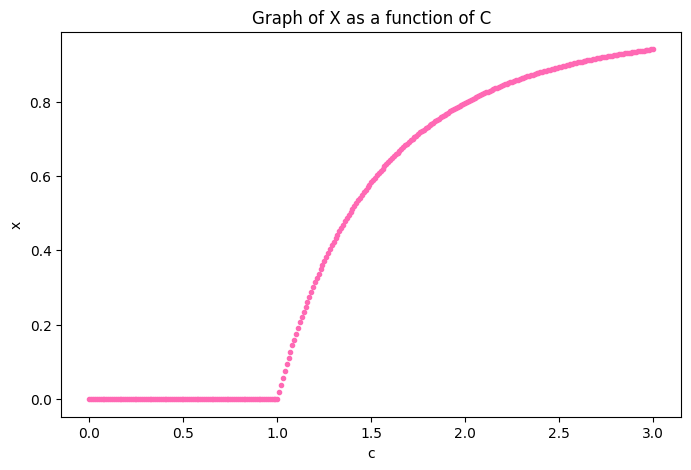

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

a = 0                                       #   c lower bound
b = 3                                       #   c upper bound
step = 0.01                                 #   step intervals
c_steps = np.arange(a, b + step, step)      #   initialize array from 0 to 3.01 with step intervals 0.01
accuracy = 1e-16
result = []                                 #   initializing array to store solutions for each step

for i in c_steps:                           #   loops through all c values in c_steps 
    e = 1.0                                 #   initial value for error
    x = 1.0                                 #   inital value for x
    while e > acc:                          #   loops when error is greater than goal accuracy
        x, x_1 = f(i,x), x                  #   stores function result to x, and storing old x to x_1
        e = abs((x-x_1)/(1-(1/(2*m.exp(-i*x_1)))))      #   calculating error using Eq 6.83 from Newman book
    result = np.append(result,x)            #   storing x for respective c values in the array named result

plt.figure(figsize = (8,5))
plt.scatter(c_steps, result, marker = '.', color ='hotpink')        #   plotting c_steps in x axis, and result in y-axis
plt.xlabel('c')
plt.ylabel('x')
plt.title('Graph of X as a function of C')
plt.show()    
    

From the graph, the relaxation method will give solutions that are zero from c = 0 until c = 1.0. In other words, solution is zero when c is between 0 and 1.01. As c values increase, the solutions given by the relaxation method approach to the correct/final answer. It follows a logarithmic curve.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [4]:
#   constants are defined below
#   taken from App Physics 155 Discord server
G = 6.674e-11           #   gravitational constant
M = 5.974e24            #   earth mass
m = 7.348e22            #   moon mass
R = 3.844e8             #   distance from Earth to moon
w = 2.662e-6            #   angular velocity of both moon and the satellite

#   defining function f(x)
def f(G, M, m, R, r, w):                                    
    return ((G*M)/r**2) - ((G*m)/((R-r)**2)) - (w**2)*r

#   defining function f'(x) or the derivative of f(x)
def df(G, M, m, R, r, w):
    return -((2*G*M)/r**3) - ((2*G*m)/(R-r)**3) - w**2

r = 1.0                                                     #   initial value of r chosen to be 1
accuracy = 1e-4                                             #   goal accuracy (up to 4 decimal places)
delta = 1.0                                                 #   initial value
while abs(delta) > accuracy:                                #   looping until goal accuracy is achieved
    delta = f(G, M, m, R, r, w)/ df(G, M, m, R, r, w)       #   iterating delta as f(x)/f'(x)
    r -= delta                                              #   from Eq. 6.96 transformed to r' = r - f(x)/f'(x)

print('The distance from the Earth to the L1 point is',r,'meters')


The distance from the Earth to the L1 point is 326045071.66535544 meters
